TASK 1: THE SPARKS FOUNDATION NOV'21

TOPIC: PREDICT THE PERCENTAGE OF THE STUDENT ON THE BASIS OF STUDY HOURS.WHAT WILL BE THE PREDICTED SCORE IF STUDENT STUDY 9.25HRS/DAY

DATA SET USED: http://bit.ly/w-data

DONE BY: MINHAL MANNAN,DATA SCIENCE AND BUSINESS ANALYTICS NOV'21

In [38]:
import pandas as pd #analyses data
import numpy as np #linear algebra
import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns #data visualization
import sklearn #ml predictions
%matplotlib inline

In [39]:
data=pd.read_csv("Hours,Scores.CSV")

In [40]:
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [41]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [42]:
data.info() #info method tells us the nummber of rows and columns in our data and the data type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [43]:
data.shape

(25, 2)

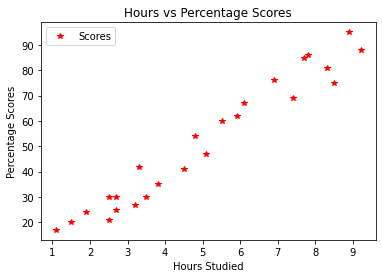

In [44]:
data.plot("Hours","Scores",style="*",color="red")
plt.title("Hours vs Percentage Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.show()

INFERENCE FROM THE ABOVE GRAPH: 
From the above graph we observe that there is a positive linear relationship between the 2 varaiables "Hours and Scores".Scores are increasing per hour


In [45]:
X=data["Hours"].values.reshape(-1,1)
y=data["Scores"].values

In [46]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)
print("splitting complete successfully")

splitting complete successfully


In [47]:
len(X_train),len(X_test),len(y_train),len(y_test)

(17, 8, 17, 8)

In [48]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [49]:
print("Intercept: ",regressor.intercept_)
print("Slope coefficient: ",regressor.coef_)



Intercept:  2.4213083775758264
Slope coefficient:  [9.81206695]


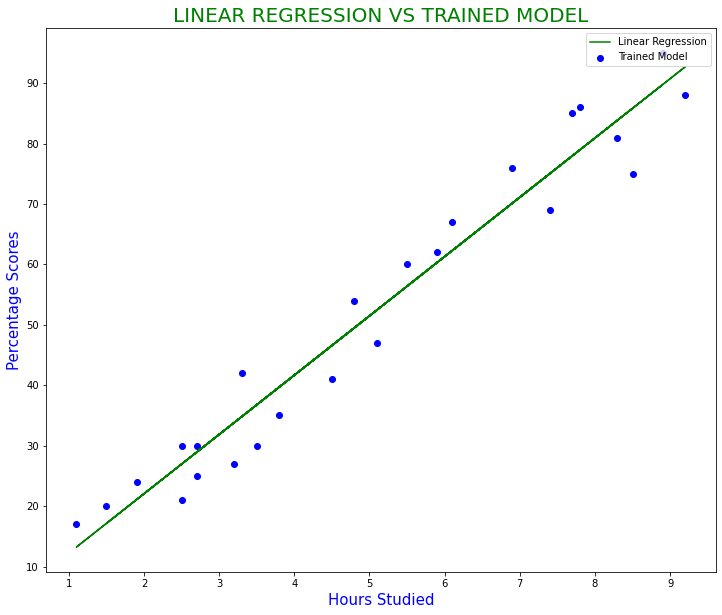

In [50]:
#plotting the regression line to observe the values machine has learned
reg_line=regressor.coef_*X+regressor.intercept_
plt.figure(figsize=(12,10))
plt.title("LINEAR REGRESSION VS TRAINED MODEL",fontsize=20,color="green")
plt.scatter(X,y,label="Trained Model",color='blue')
plt.plot(X,reg_line,label="Linear Regression",color="green")
plt.xlabel("Hours Studied",color="Blue",fontsize=15)
plt.ylabel("Percentage Scores",color="blue",fontsize=15)
plt.legend(loc=1)
plt.show()

In [51]:
y_pred=regressor.predict(X_test)
y_pred

array([75.0306038 , 70.12457032, 46.57560965, 36.7635427 , 62.27491676,
       52.46284982, 34.80112931, 26.95147575])

In [52]:
data_pred=pd.DataFrame({"Actual Scores": y_test,"Predicted Scores":y_pred})
data_pred

,Actual Scores,Predicted Scores
0,69,75.030604
1,76,70.124570
2,41,46.575610
3,30,36.763543
4,67,62.274917
5,47,52.462850
6,42,34.801129
7,30,26.951476


<AxesSubplot:ylabel='Count'>

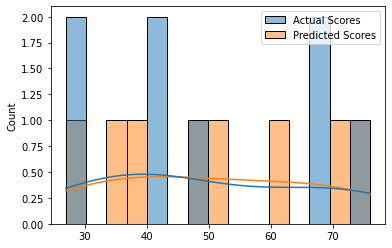

In [53]:
sns.histplot(data_pred,bins=15,kde=True)

In [54]:
regressor.score(X_test,y_test)

0.8854976232318078

In [55]:
from sklearn import metrics
#RMSE performs best for regression when outliers are rare
print("MAE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 5.711919202893784


In [56]:
#making predictions on random hours 
hours=([9.25,9.5,9.7,10,11])
hours=pd.DataFrame(hours)
new_pred=regressor.predict(hours)
new_pred=pd.DataFrame(new_pred)
data_new=pd.concat([hours,new_pred],axis=1,keys=['Hours','Predicted Scores'])
data_new


,Hours,Predicted Scores
,0,0
0,9.25,93.182928
1,9.50,95.635944
2,9.70,97.598358
3,10.00,100.541978
4,11.00,110.354045


Predicted Score for study of 9.25 hrs/day is 93.18%